## 1.0  Importing required libraries to know about the data

### About this file
+ N = Nitrogen
+ P = phosphorous
+ K = Potassium
+ Temperature=The average soil temperatures for bioactivity range from 50 to 75F.
+ Ph = A scale used to identify acidity or basicity nature; (Acid Nature- Ph<7; Neutral- Ph=7; Base Nature-P>7)
+ label = Types of Crop (Rice,Maize, Chickpea; Kidney beans; pigeonpeas; mothbeans; mungbean;blackgram; lentil; pomegranate; banana; mango; grapes; watermelon; muskmelon; apple; orange;papaya; coconut; cotton; jute; coffee)

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [8]:
data.shape

(2200, 8)

In [9]:
data.duplicated().sum()

0

In [10]:
for i in data:
    print(data[i].value_counts())

22     44
40     44
27     42
39     41
31     41
       ..
136     2
139     1
135     1
130     1
46      1
Name: N, Length: 137, dtype: int64
60    56
58    48
56    46
55    44
57    42
      ..
83     2
82     2
90     2
93     1
84     1
Name: P, Length: 117, dtype: int64
17    90
22    87
15    86
20    80
25    78
      ..
5      8
11     8
13     7
7      5
80     4
Name: K, Length: 73, dtype: int64
20.879744    1
29.480699    1
29.943492    1
28.033065    1
29.884305    1
            ..
25.365861    1
28.568406    1
30.284966    1
27.325421    1
23.603016    1
Name: temperature, Length: 2200, dtype: int64
82.002744    1
90.336987    1
93.907412    1
91.473558    1
94.037115    1
            ..
66.637972    1
61.532786    1
61.692951    1
69.090478    1
60.396475    1
Name: humidity, Length: 2200, dtype: int64
6.502985    1
6.640471    1
6.251420    1
6.274453    1
6.135996    1
           ..
7.538631    1
7.127064    1
6.628265    1
6.726469    1
6.779833    1
Name: ph, Lengt

In [11]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [13]:
crop_overview = pd.pivot_table(data, index = ['label'])
crop_overview

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


## 2.0 Visualisation of Data

#### 2.1 Heatmap with correlation coff.

<AxesSubplot:>

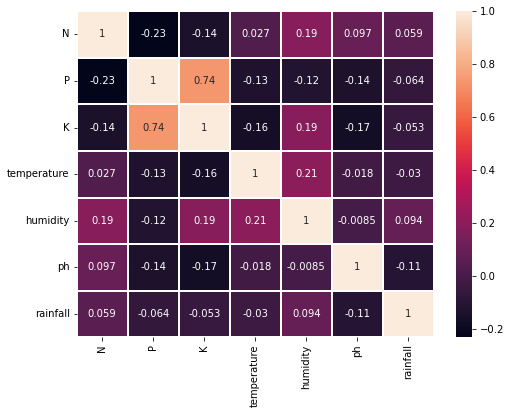

In [14]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), annot = True, linewidth = 2)

#### 2.2 Boxplot

In [20]:
attributes = data.drop('label', axis = 1)

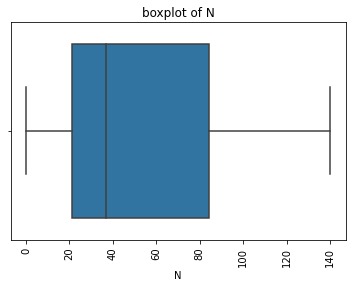

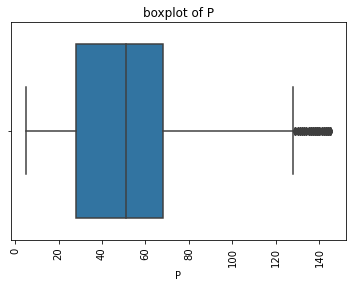

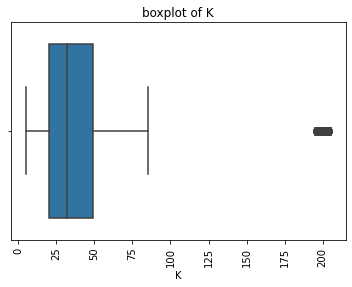

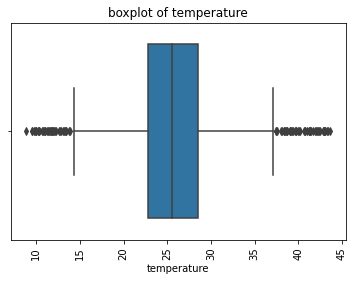

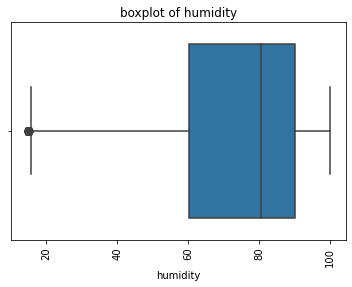

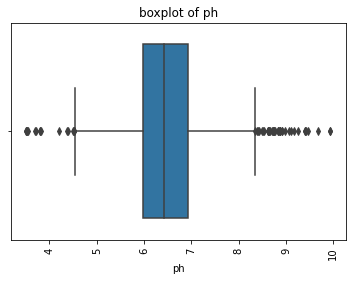

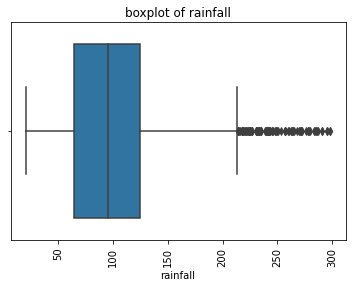

In [21]:
for index in attributes:
    plt.figure(figsize = (6,4))
    sns.boxplot(attributes[index])
    plt.xticks(rotation = 90)
    plt.title(f'boxplot of {index}')

#### 2.3 Pie Chart

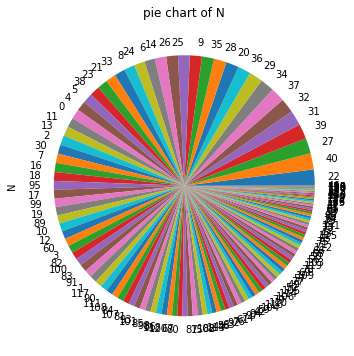

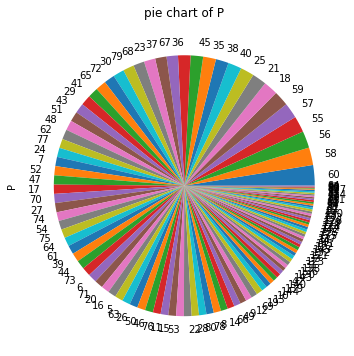

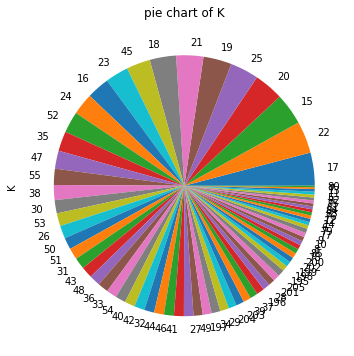

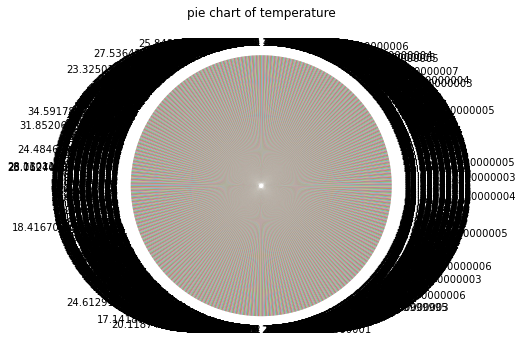

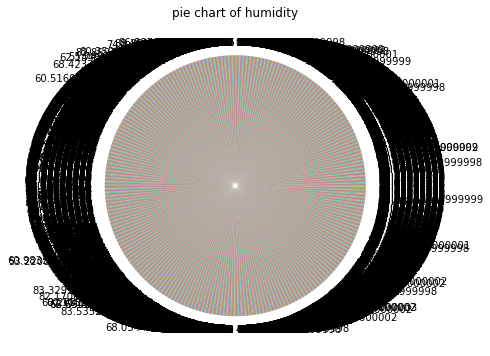

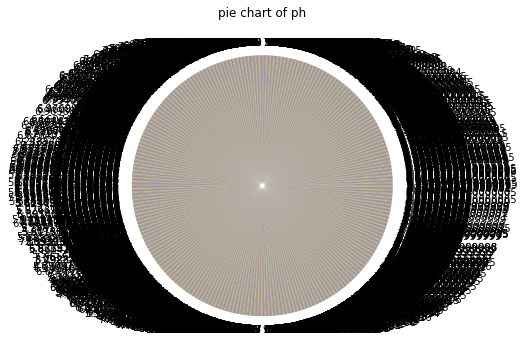

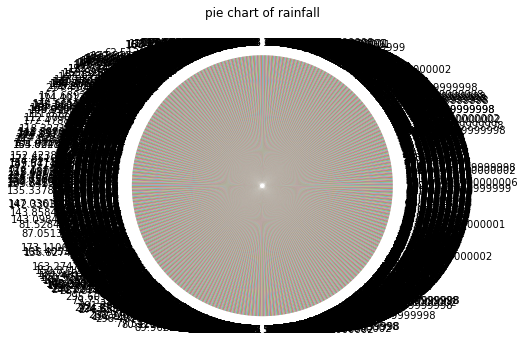

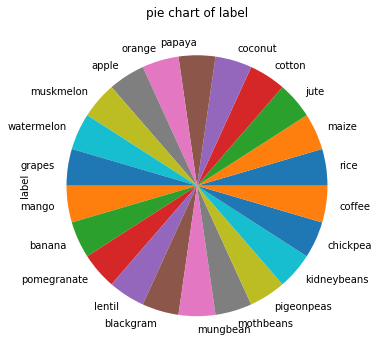

In [22]:
for index in data:
    plt.figure(figsize = (8,6))
    data[index].value_counts().plot(kind = 'pie')
    plt.title(f'pie chart of {index}')

#### 2.4 Pairplot

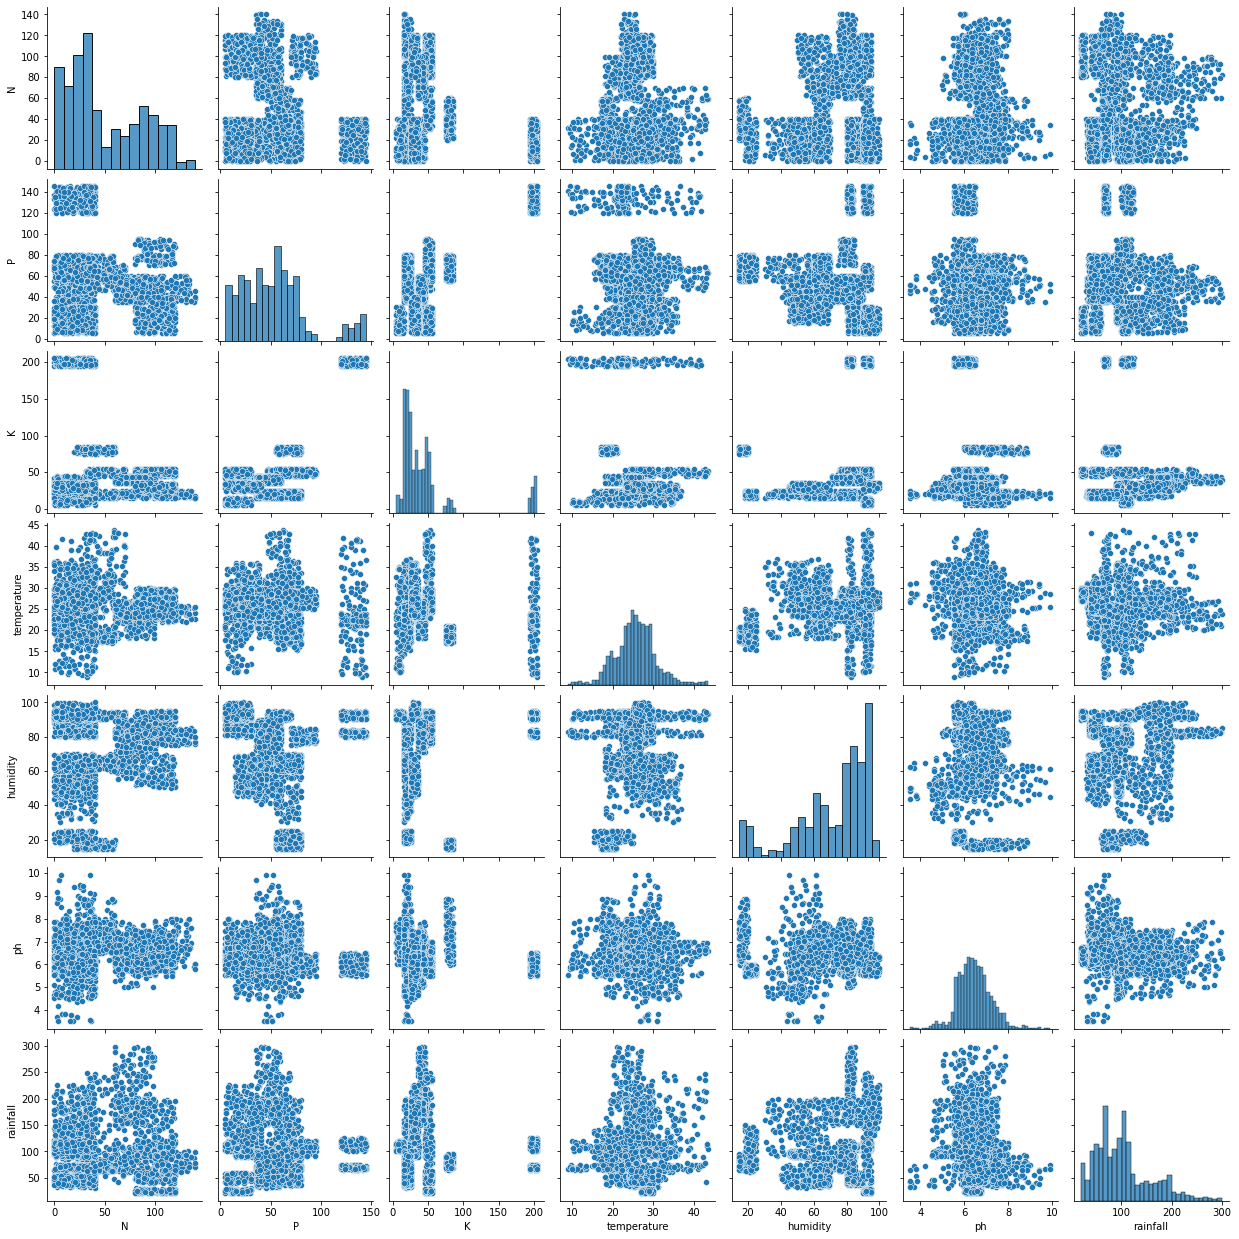

In [53]:
sns.pairplot(data)

### These are the attributes in which there is outliers
+ P
+ K
+ temperature
+ humidity
+ ph
+ rainfall

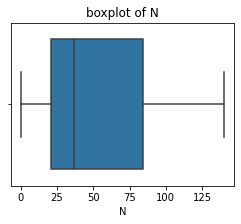

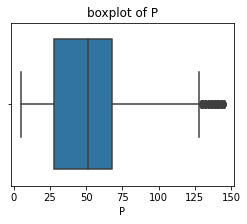

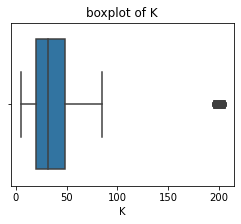

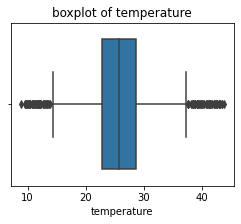

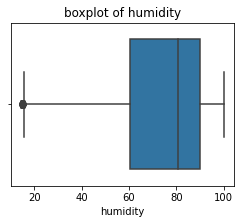

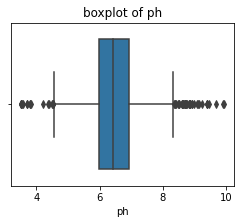

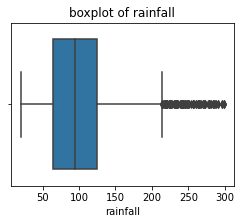

In [23]:
for index in attributes:
    plt.figure(figsize = (4,3))
    sns.boxplot(attributes[index])
    plt.title(f'boxplot of {index}')

+ **Trying Removing the Outliers**

In [24]:
def remove_outliers(df):   
    #first quartile
    Q1 = df.quantile(0.25)
    # Third quartile
    Q3 = df.quantile(0.75)
    # Inter Quartile Range
    IQR = Q3 - Q1
    # Upper Limit
    upper = Q3 + 1.5*IQR
    # lower limit
    lower = Q1 - 1.5*IQR
    data_final = df[~((df<lower)|(df>upper))]
    return data_final

In [25]:
remove_outliers(attributes)

,N,P,K,temperature,humidity,ph,rainfall
0,90,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85,58.0,41.0,21.770462,80.319644,7.038096,NaN
2,60,55.0,44.0,23.004459,82.320763,7.840207,NaN
3,74,35.0,40.0,26.491096,80.158363,6.980401,NaN
4,78,42.0,42.0,20.130175,81.604873,7.628473,NaN
...,...,...,...,...,...,...,...
2195,107,34.0,32.0,26.774637,66.413269,6.780064,177.774507
2196,99,15.0,27.0,27.417112,56.636362,6.086922,127.924610
2197,118,33.0,30.0,24.131797,67.225123,6.362608,173.322839
2198,117,32.0,34.0,26.272418,52.127394,6.758793,127.175293


In [ ]:
for index in attributes:
    plt.figure(figsize = (4,3))
    sns.boxplot(attributes[index])
    plt.title(f'boxplot of{index}')

+ __Outliers gets decreased little bit__

In [26]:
X = attributes
y = data['label']

In [27]:
X.shape

(2200, 7)

In [28]:
y.shape

(2200,)

## 3.0 Modelling using Machine Learning

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                    shuffle = True, random_state = 0)

### 3.1 Light Gradient Boosting Machine (lightgbm)

In [30]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [31]:
pred = model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.9889807162534435
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      0.97      0.97        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      0.97      0.98        32
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        33
        jute       0.97      0.94      0.95        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.96      0.98        26
       maize       0.93      0.97      0.95        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.97      1.00      0.99        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      pa

Text(0.5, 1.0, 'Confusion Matrix with Accuracy = 0.9889807162534435')

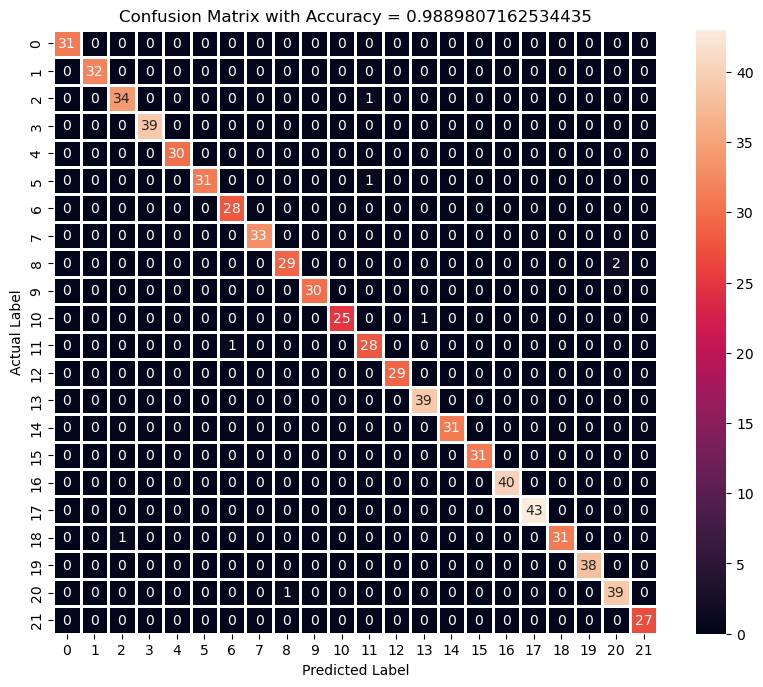

In [40]:
cm = confusion_matrix(y_test,pred)
plt.figure(figsize = (10,8), dpi = 100)
sns.heatmap(cm, annot = True, linewidth = 1, square = True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix with Accuracy = 0.9889807162534435')

### 3.2 Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
pred = dtc.predict(X_test)

In [44]:
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.9834710743801653
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      0.97      0.97        35
    chickpea       0.95      1.00      0.97        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        33
        jute       0.94      0.94      0.94        31
 kidneybeans       1.00      0.93      0.97        30
      lentil       1.00      0.92      0.96        26
       maize       0.97      0.97      0.97        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.95      0.97      0.96        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      pa

Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Classifier with Accuracy = 0.9834710743801653')

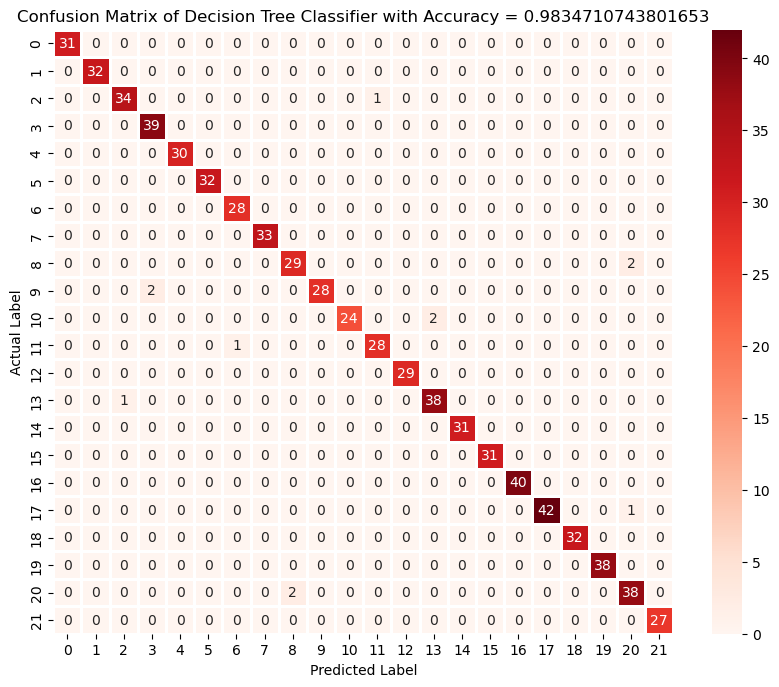

In [46]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (10,8), dpi = 100)
sns.heatmap(cm, annot = True, linewidth = 1, cmap = 'Reds')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Decision Tree Classifier with Accuracy = 0.9834710743801653')

### 3.3 Random Forest Classifier 

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train )

RandomForestClassifier()

In [48]:
pred = rfc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test, pred))

0.9944903581267218
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      0.97      0.97        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.97      1.00      0.98        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.96      0.98        26
       maize       0.97      1.00      0.98        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.97      0.97      0.97        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      pa

Text(0.5, 1.0, 'Confusion Matrix of Random Forest Classifier with Accuracy = 0.9944903581267218')

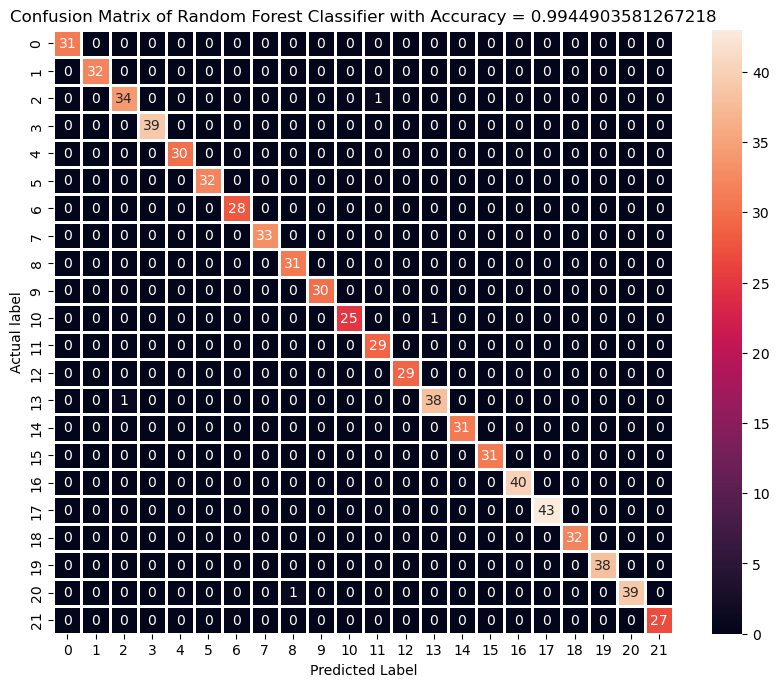

In [49]:
cm = confusion_matrix(y_test,pred)
plt.figure(figsize = (10,8), dpi = 100)
sns.heatmap(cm, annot = True, linewidth = 1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix of Random Forest Classifier with Accuracy = 0.9944903581267218')

### Thank You